In [1]:
import pickle
import scipy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
const = 12
SMALL_SIZE = 8 + const  
MEDIUM_SIZE = 10 + const
BIGGER_SIZE = 12 + const

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
actuals, predicteds, subs, npcs = pickle.load(open('./saved_models/ABCD_saved_results.pickle', 'rb'))
site_order = pickle.load(open('./saved_models/ABCD_site_order.pickle', 'rb'))

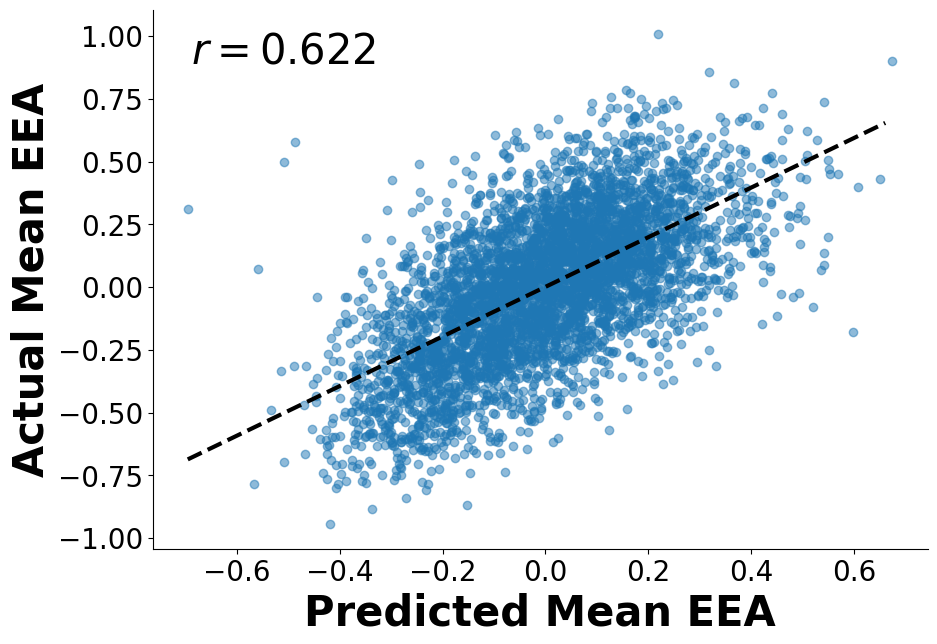

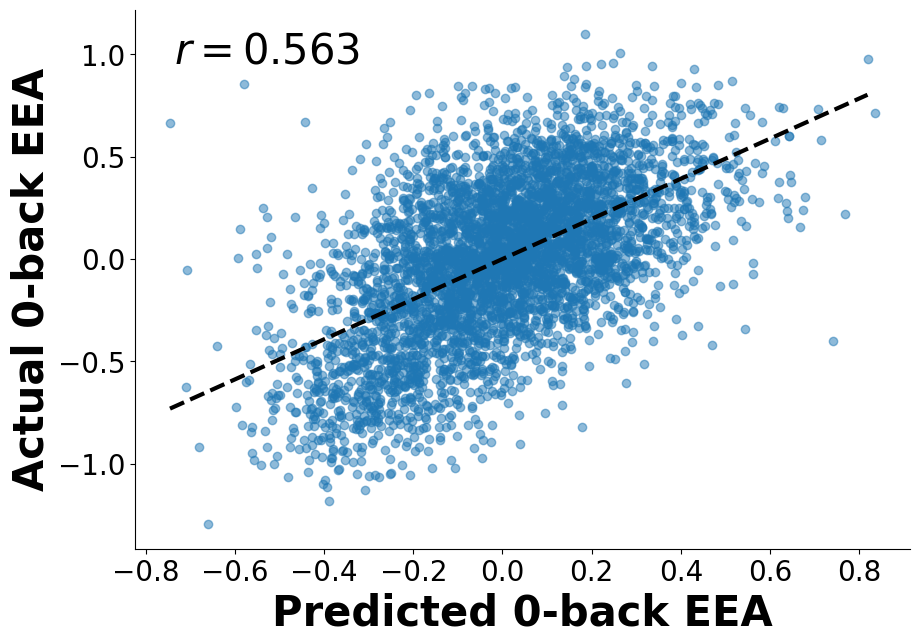

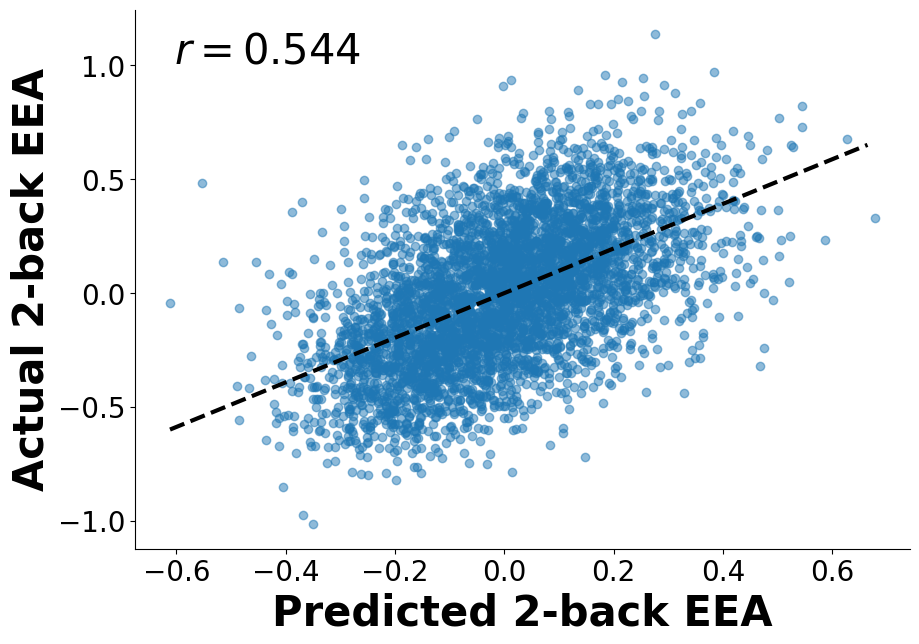

In [4]:
pheno_names = ['mean_EEA', '0bk_EEA', '2bk_EEA']
pheno_plot_names = ['Mean EEA', '0-back EEA', '2-back EEA']

for pheno_i in range(len(pheno_names)):

    plt.figure(figsize=(10, 7))
    plt.scatter(predicteds[:, pheno_i], actuals[:, pheno_i], alpha=0.5)
    plt.xlabel(f'Predicted {pheno_plot_names[pheno_i]}', fontsize=30, fontweight='bold')
    plt.ylabel(f'Actual {pheno_plot_names[pheno_i]}', fontsize=30, fontweight='bold')

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    X = predicteds[:, pheno_i]
    Y = actuals[:, pheno_i]
    best_fit = np.poly1d(np.polyfit(X, Y, 1))
    newX = np.arange(min(X), max(X), (max(X) - min(X))/100)
    yfit = best_fit(newX)
    plt.plot(newX, yfit, linewidth=3, linestyle='--', c='k')

    r = scipy.stats.pearsonr(X, Y)[0]
    plt.text(0.05, 0.9, f'$r =${r:.3f}', fontsize=30, transform = ax.transAxes)

    plt.show()

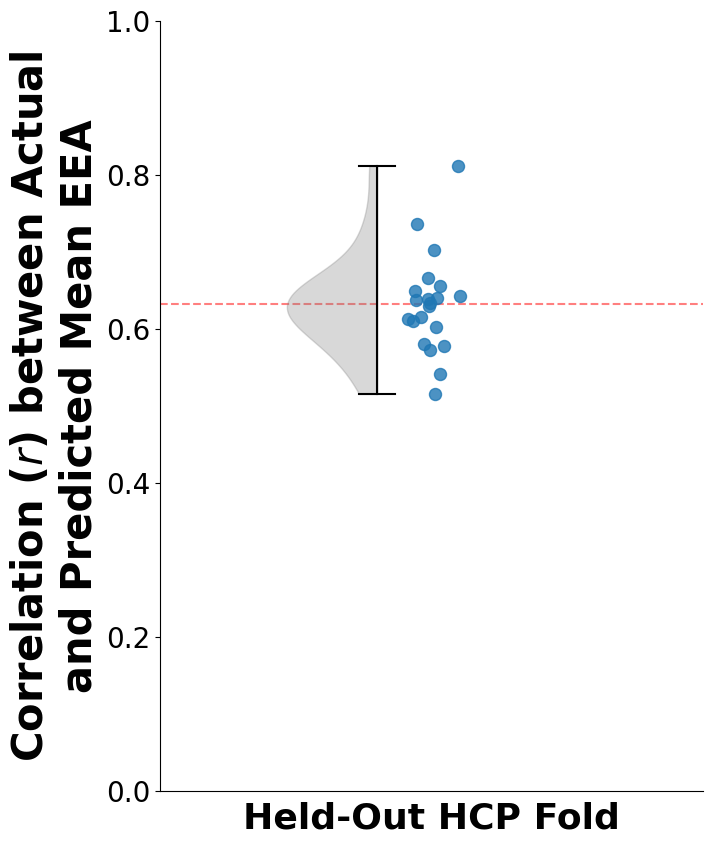

In [5]:
np.random.seed(42)
site_ids = site_order
unique_sites = sorted(np.unique(site_order))
n_valid_folds = 5
test_r_cv = []

for site_id, random_test_site in enumerate(unique_sites):
    train_idxs = np.argwhere(site_ids != random_test_site).flatten()
    test_idxs = np.argwhere(site_ids == random_test_site).flatten()
    assert len(set(test_idxs).intersection(set(train_idxs))) == 0
        
    valid_folds = np.array_split(np.random.choice(train_idxs, size=len(train_idxs), replace=False), n_valid_folds)
    test_r_cv.append(scipy.stats.pearsonr(actuals[test_idxs, :][:, 0], predicteds[test_idxs, :][:, 0])[0])
    
    

plt.figure(figsize=(7, 10))
test_r = np.array(test_r_cv)
plt.axhline(y=np.mean(test_r), c='r', linestyle='--', zorder=0, alpha=0.5)

plt.scatter(np.random.normal(0, 0.05, len(test_r)), test_r, s=75, alpha=0.8, zorder=1)
plt.ylim(0, 1)
plt.xlim(-0.75, 0.75)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

v1 = plt.violinplot(test_r, positions=[-0.15],
                   showmeans=False, showextrema=False, 
                   showmedians=False)
for b in v1['bodies']:
    # get the center
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # modify the paths to not go further right than the center
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
    b.set_color('gray')
    b.set_zorder(1)
    
plt.plot([-0.15, -0.15], [np.min(test_r), np.max(test_r)], color='k')
plt.plot([-0.2, -0.1], [np.min(test_r), np.min(test_r)], color='k')
plt.plot([-0.2, -0.1], [np.max(test_r), np.max(test_r)], color='k')

plt.xticks([])
plt.xlabel('Held-Out HCP Fold', fontsize=26, fontweight='bold')
plt.ylabel('Correlation ($r$) between Actual\nand Predicted Mean EEA', fontsize=30, fontweight='bold')


plt.show()

In [6]:
actuals, predicteds, subs, npcs = pickle.load(open('./saved_models/HCP_saved_results.pickle', 'rb'))
site_order = pickle.load(open('./saved_models/HCP_site_order.pickle', 'rb'))

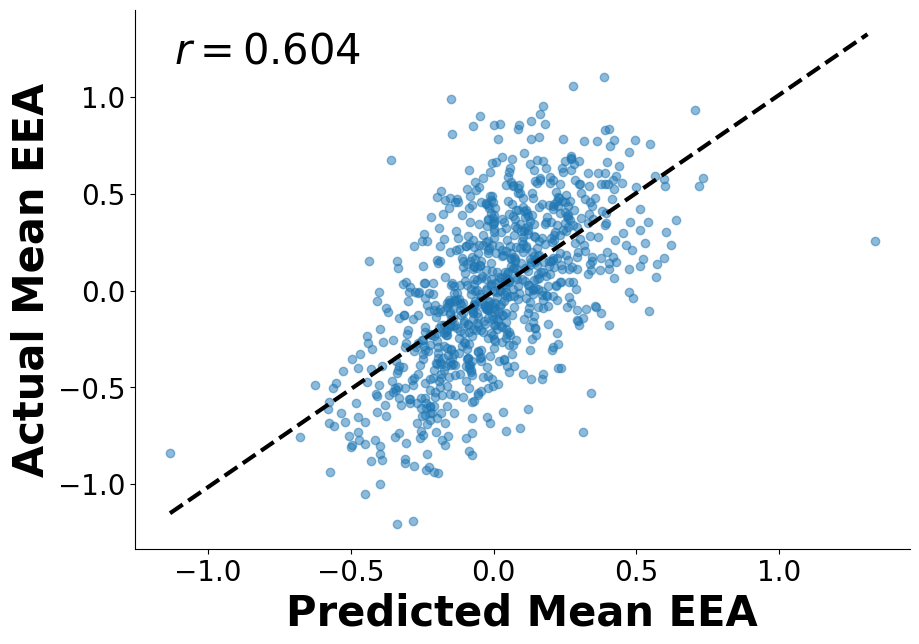

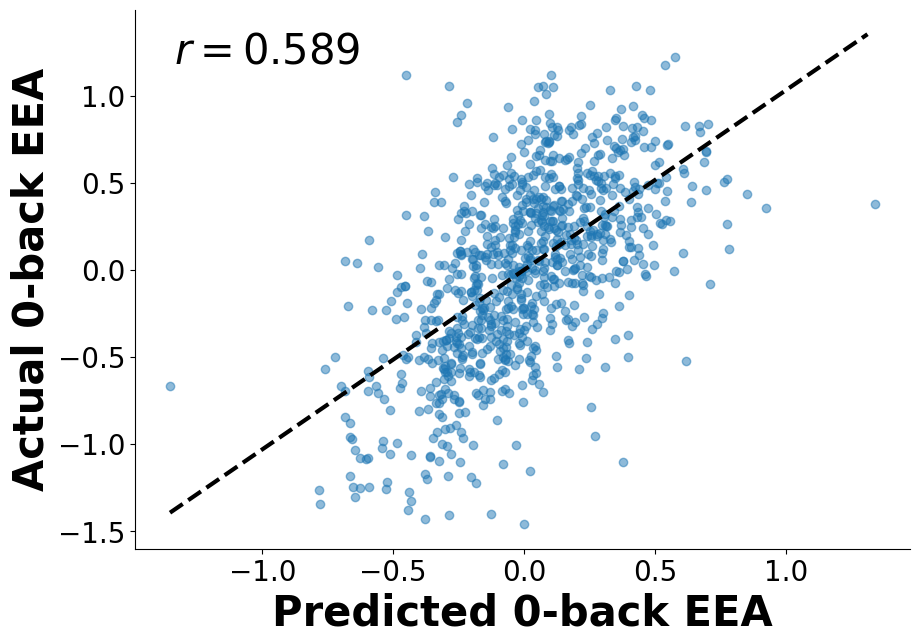

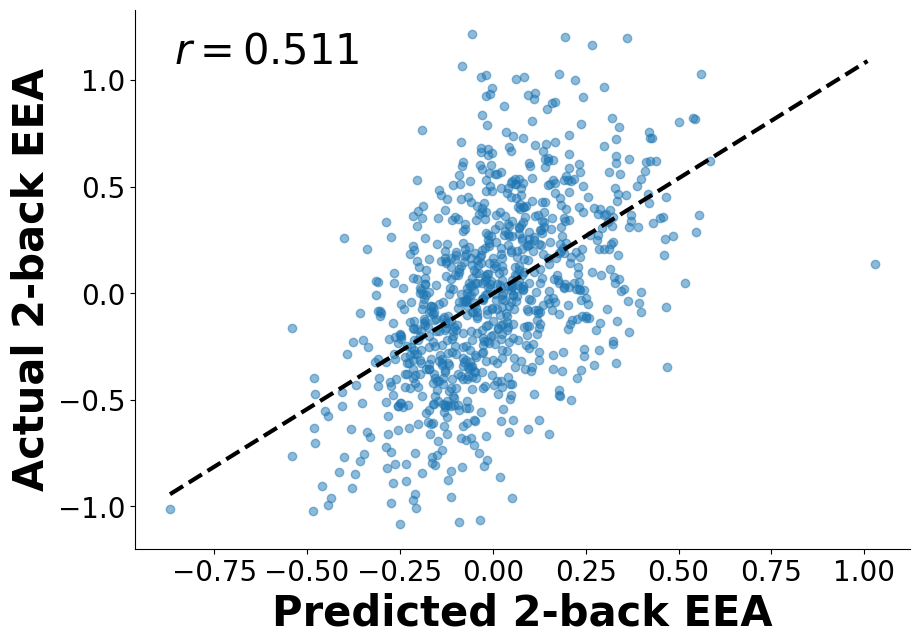

In [7]:
pheno_names = ['mean_EEA', '0bk_EEA', '2bk_EEA']
pheno_plot_names = ['Mean EEA', '0-back EEA', '2-back EEA']

for pheno_i in range(len(pheno_names)):

    plt.figure(figsize=(10, 7))
    plt.scatter(predicteds[:, pheno_i], actuals[:, pheno_i], alpha=0.5)
    plt.xlabel(f'Predicted {pheno_plot_names[pheno_i]}', fontsize=30, fontweight='bold')
    plt.ylabel(f'Actual {pheno_plot_names[pheno_i]}', fontsize=30, fontweight='bold')

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    X = predicteds[:, pheno_i]
    Y = actuals[:, pheno_i]
    best_fit = np.poly1d(np.polyfit(X, Y, 1))
    newX = np.arange(min(X), max(X), (max(X) - min(X))/100)
    yfit = best_fit(newX)
    plt.plot(newX, yfit, linewidth=3, linestyle='--', c='k')

    r = scipy.stats.pearsonr(X, Y)[0]
    plt.text(0.05, 0.9, f'$r =${r:.3f}', fontsize=30, transform = ax.transAxes)

    plt.show()

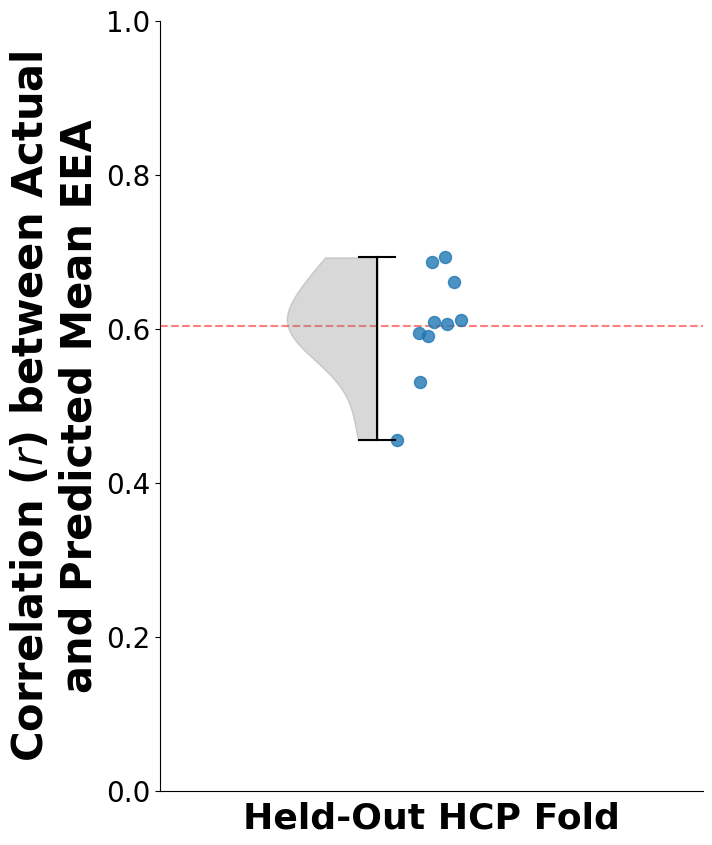

In [8]:
np.random.seed(42)
site_ids = site_order
unique_sites = sorted(np.unique(site_order))
n_valid_folds = 5
test_r_cv = []

for site_id, random_test_site in enumerate(unique_sites):
    train_idxs = np.argwhere(site_ids != random_test_site).flatten()
    test_idxs = np.argwhere(site_ids == random_test_site).flatten()
    assert len(set(test_idxs).intersection(set(train_idxs))) == 0
        
    valid_folds = np.array_split(np.random.choice(train_idxs, size=len(train_idxs), replace=False), n_valid_folds)
    test_r_cv.append(scipy.stats.pearsonr(actuals[test_idxs, :][:, 0], predicteds[test_idxs, :][:, 0])[0])
    
    

plt.figure(figsize=(7, 10))
test_r = np.array(test_r_cv)
plt.axhline(y=np.mean(test_r), c='r', linestyle='--', zorder=0, alpha=0.5)

plt.scatter(np.random.normal(0, 0.05, len(test_r)), test_r, s=75, alpha=0.8, zorder=1)
plt.ylim(0, 1)
plt.xlim(-0.75, 0.75)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

v1 = plt.violinplot(test_r, positions=[-0.15],
                   showmeans=False, showextrema=False, 
                   showmedians=False)
for b in v1['bodies']:
    # get the center
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # modify the paths to not go further right than the center
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
    b.set_color('gray')
    b.set_zorder(1)
    
plt.plot([-0.15, -0.15], [np.min(test_r), np.max(test_r)], color='k')
plt.plot([-0.2, -0.1], [np.min(test_r), np.min(test_r)], color='k')
plt.plot([-0.2, -0.1], [np.max(test_r), np.max(test_r)], color='k')

plt.xticks([])
plt.xlabel('Held-Out HCP Fold', fontsize=26, fontweight='bold')
plt.ylabel('Correlation ($r$) between Actual\nand Predicted Mean EEA', fontsize=30, fontweight='bold')


plt.show()

In [9]:
import matplotlib
from matplotlib.patches import Polygon


def plot_figure3(net, left_Y, is_ABCD):
    # please contact the authors to access these data files
    if is_ABCD:
        dat_df = pd.read_csv('./abcd_base_nback_postmedians_v5_asw.csv')
    else:
        dat_df = pd.read_csv('./hcp_nback_postmedians_v5_asw.csv')

    dat_df['diff_2'] = dat_df[f'{net}_2bk.resid'].values.flatten()
    dat_df['diff_0'] = dat_df[f'{net}_0bk.resid'].values.flatten()

    axis_label = r"N-Back Performance ($\it{v}$)"
    mid_Y0 = 'diff_2'
    mid_Y1 = 'diff_0'
    dat_df = dat_df[[left_Y, mid_Y0, mid_Y1]].dropna()

    dat_df[left_Y] = scipy.stats.zscore(dat_df[left_Y].values.flatten())
    dat_df['diff_2'] = scipy.stats.zscore(dat_df['diff_2'].values.flatten())
    dat_df['diff_0'] = scipy.stats.zscore(dat_df['diff_0'].values.flatten())



    phen = left_Y
    dat_df = dat_df[['diff_2', 'diff_0', phen]].dropna()
    dat_df['task_0_diff'] = dat_df.diff_0.values
    dat_df['task_2_diff'] = dat_df.diff_2.values
    dat_df = dat_df.dropna()

    # line of best fit
    X = dat_df.task_0_diff.values
    Y = dat_df.task_2_diff.values
    best_fit = np.poly1d(np.polyfit(X, Y, 1))
    newX = X.copy()
    diag_vals = best_fit(X)


    plot_filtered_dat_df = dat_df
    plot_thesholded_X = X
    plot_thesholded_Y = Y
    plot_filtered_diag_vals = diag_vals


    plt.figure(figsize=(16.5, 12))

    plt.scatter(plot_filtered_dat_df.task_0_diff, plot_filtered_dat_df.task_2_diff, c=plot_filtered_dat_df[[phen]].values.flatten(), cmap=matplotlib.cm.get_cmap('afmhot_r'), alpha=0.5, s=150)

    y_high = max(plot_thesholded_Y)
    y_low = min(plot_thesholded_Y) 
    x_left = min(plot_thesholded_X)
    x_right = max(plot_thesholded_X)

    X2 = np.arange(min(plot_thesholded_X), max(plot_thesholded_X), 0.005)
    plt.plot(X2, best_fit(X2), c='k', linestyle='--', linewidth=5)

    plt.axvline(x=dat_df.task_0_diff.mean(), c='gray', alpha=0.5, linestyle='--', linewidth=5)

    plt.text(x_left, y_high, 
             f'{dat_df[(dat_df.task_0_diff < dat_df.task_0_diff.mean()) & (dat_df.task_2_diff >= diag_vals)][[phen]].values.mean():<7.3f}', fontsize=45, 
             fontweight='bold', va='top', ha='left')
    plt.text(x_right, y_high, 
             f'{dat_df[(dat_df.task_0_diff >= dat_df.task_0_diff.mean()) & (dat_df.task_2_diff >= diag_vals)][[phen]].values.mean():<7.3f}',
             fontsize=45, fontweight='bold', va='top', ha='right')
    plt.text(x_left, y_low, 
             f'{dat_df[(dat_df.task_0_diff < dat_df.task_0_diff.mean()) & (dat_df.task_2_diff < diag_vals)][[phen]].values.mean():<7.3f}', 
             fontsize=45, fontweight='bold', va='bottom', ha='left')
    plt.text(x_right, y_low, 
             f'{dat_df[(dat_df.task_0_diff >= dat_df.task_0_diff.mean()) & (dat_df.task_2_diff < diag_vals)][[phen]].values.mean():<7.3f}', 
             fontsize=45, fontweight='bold', va='bottom', ha='right')

    plt.ylabel(f'2-back {net} Activation', fontsize=45, labelpad=10)
    plt.xlabel(f'0-back {net} Activation', fontsize=50, labelpad=15)
    cbar = plt.colorbar()
    cbar.set_label(r"N-Back Task Performance (EEA)", labelpad=20, fontsize=45)
    cbar.set_alpha(1)
    cbar.ax.tick_params(labelsize=30)
    cbar.draw_all()

    ax = plt.gca()

    ax.annotate('Mean N-Back Task\n' + r"Performance (EEA)", 
                xy=(x_left+1.15, y_high+0.1), xytext=(x_left-1.3, y_high+0.9), ha='left',  # the 0.125 y_high needs to be higher to match ABCD plots
                arrowprops=dict(arrowstyle='-|>', linewidth=3, color='k'), fontsize=35)


    ax.tick_params(axis='both', which='major', labelsize=30)
    plt.show()

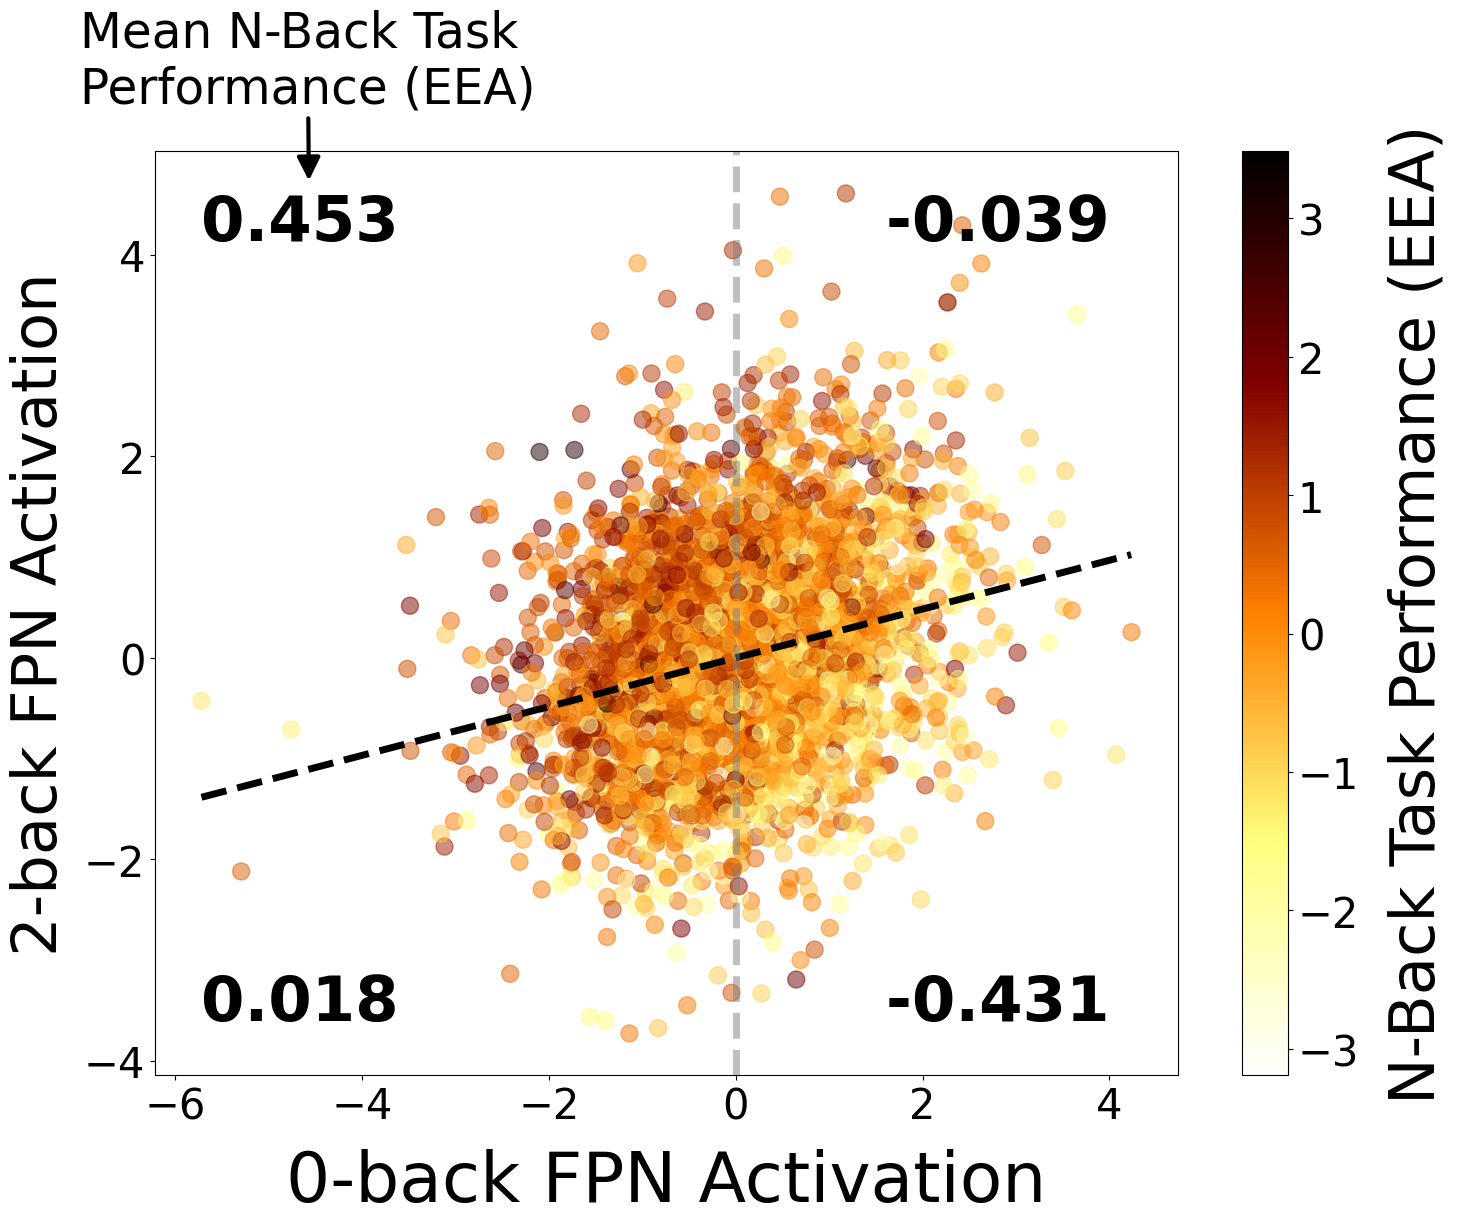

In [10]:
plot_figure3(net='FPN', left_Y='overall.v.mean.resid', is_ABCD=True)

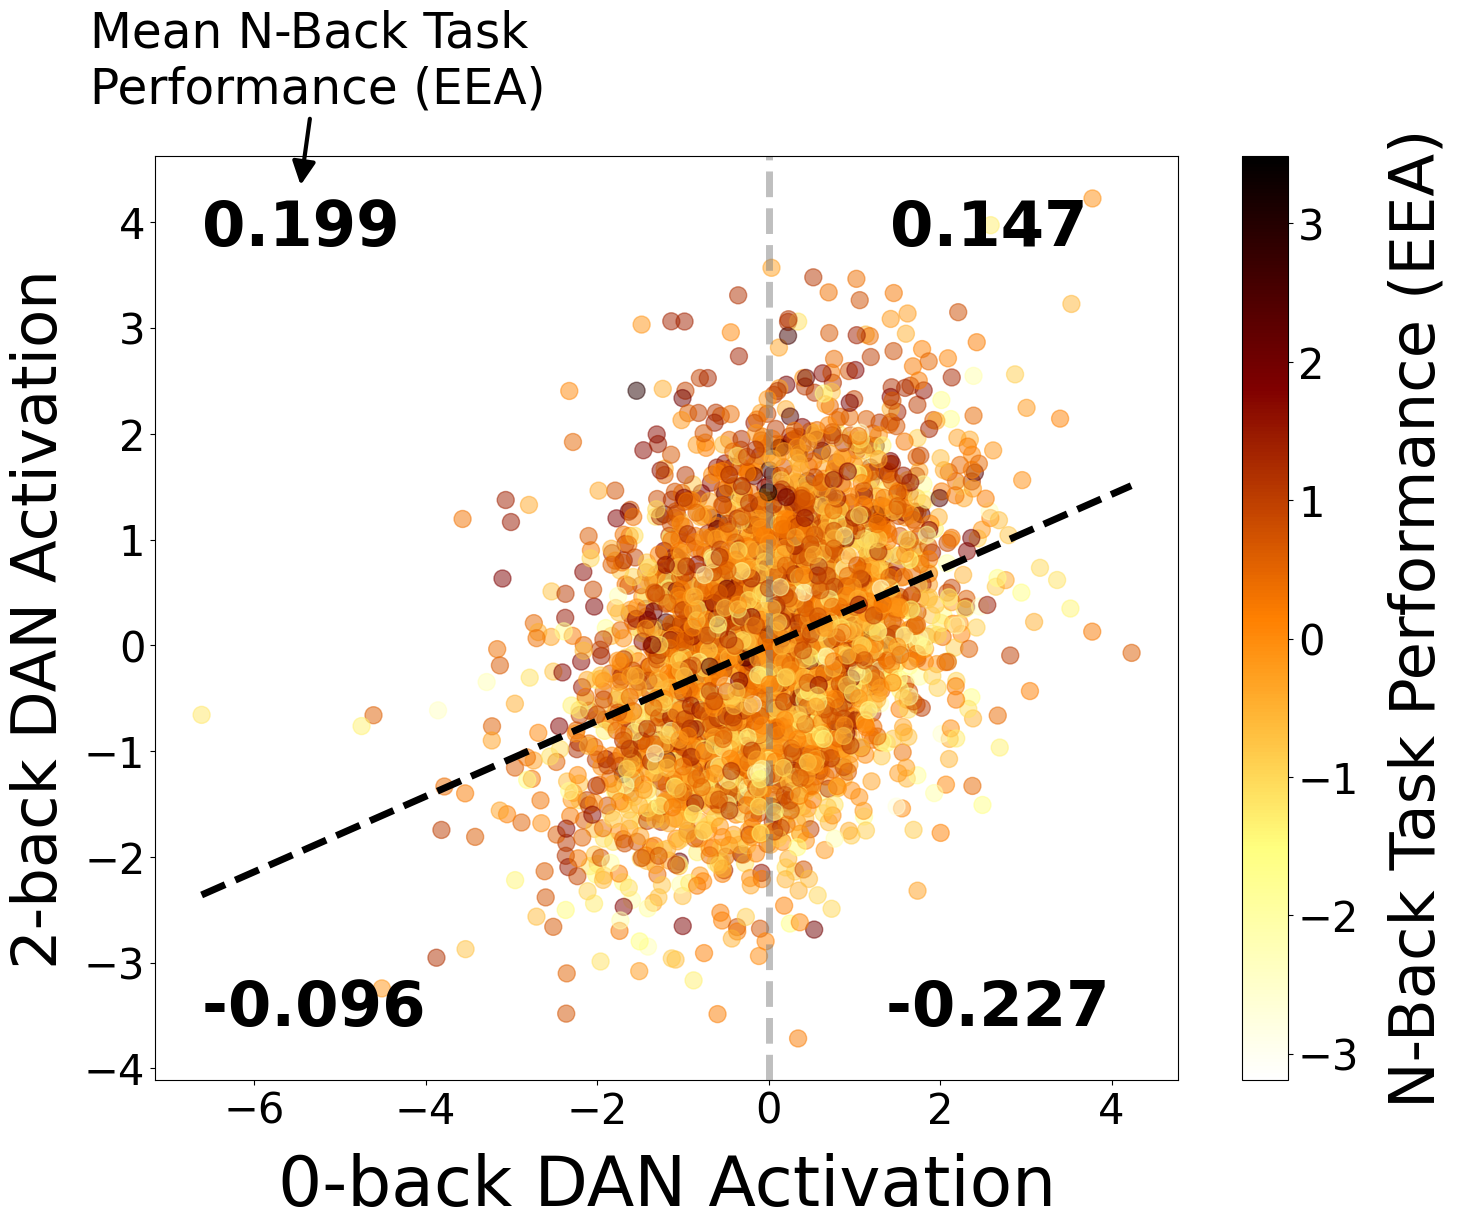

In [11]:
plot_figure3(net='DAN', left_Y='overall.v.mean.resid', is_ABCD=True)

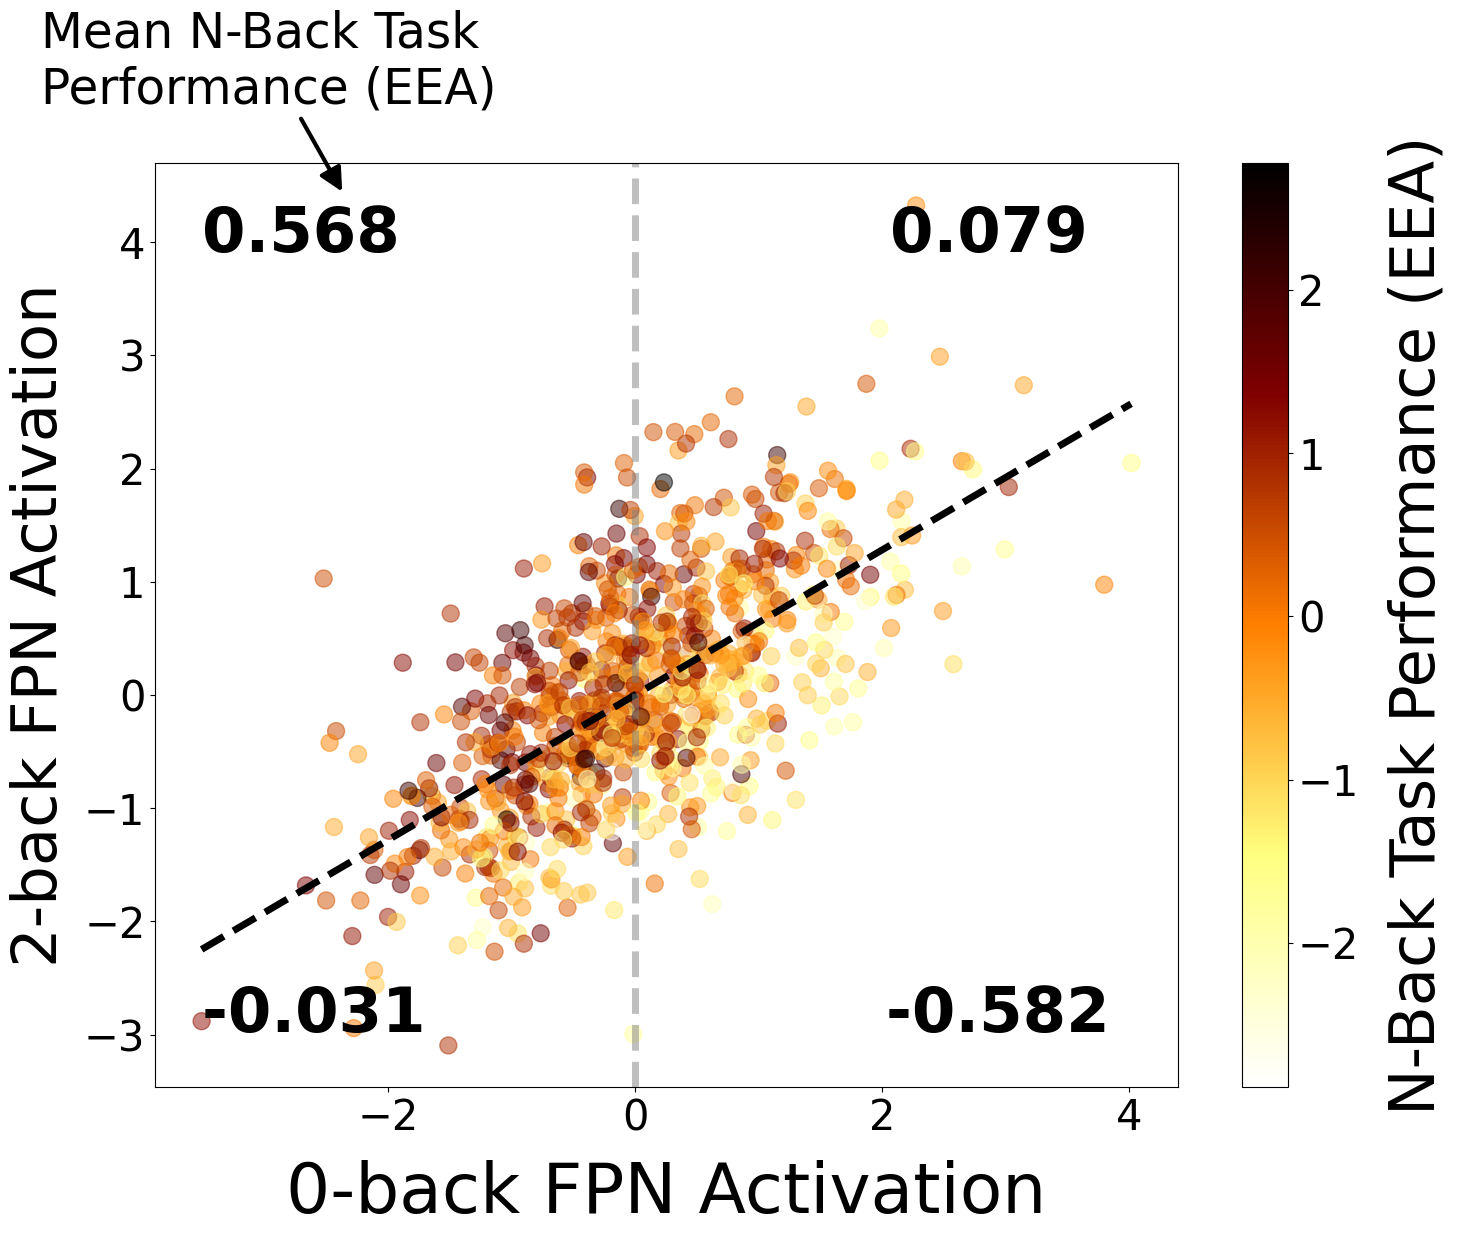

In [12]:
plot_figure3(net='FPN', left_Y='overall.v.mean.resid', is_ABCD=False)

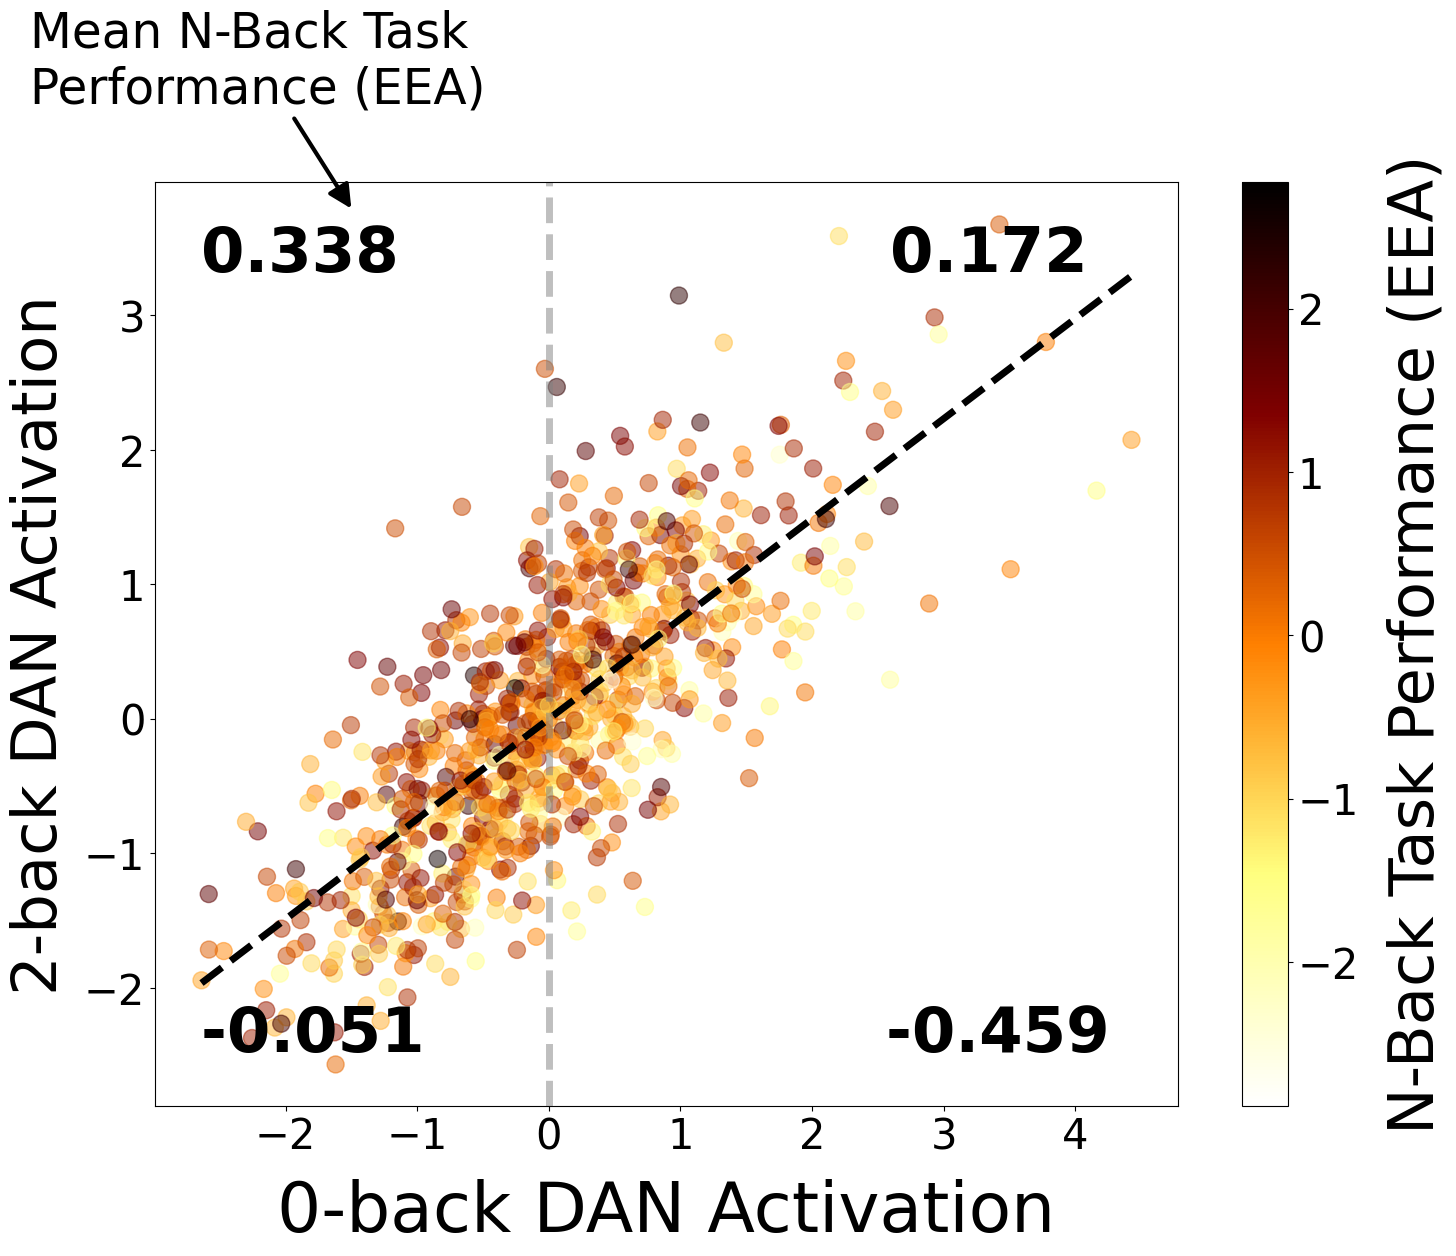

In [14]:
plot_figure3(net='DAN', left_Y='overall.v.mean.resid', is_ABCD=False)

In [17]:
np.poly1d(np.polyfit(X, Y, 1))

poly1d([0.0072004 , 0.13439064])

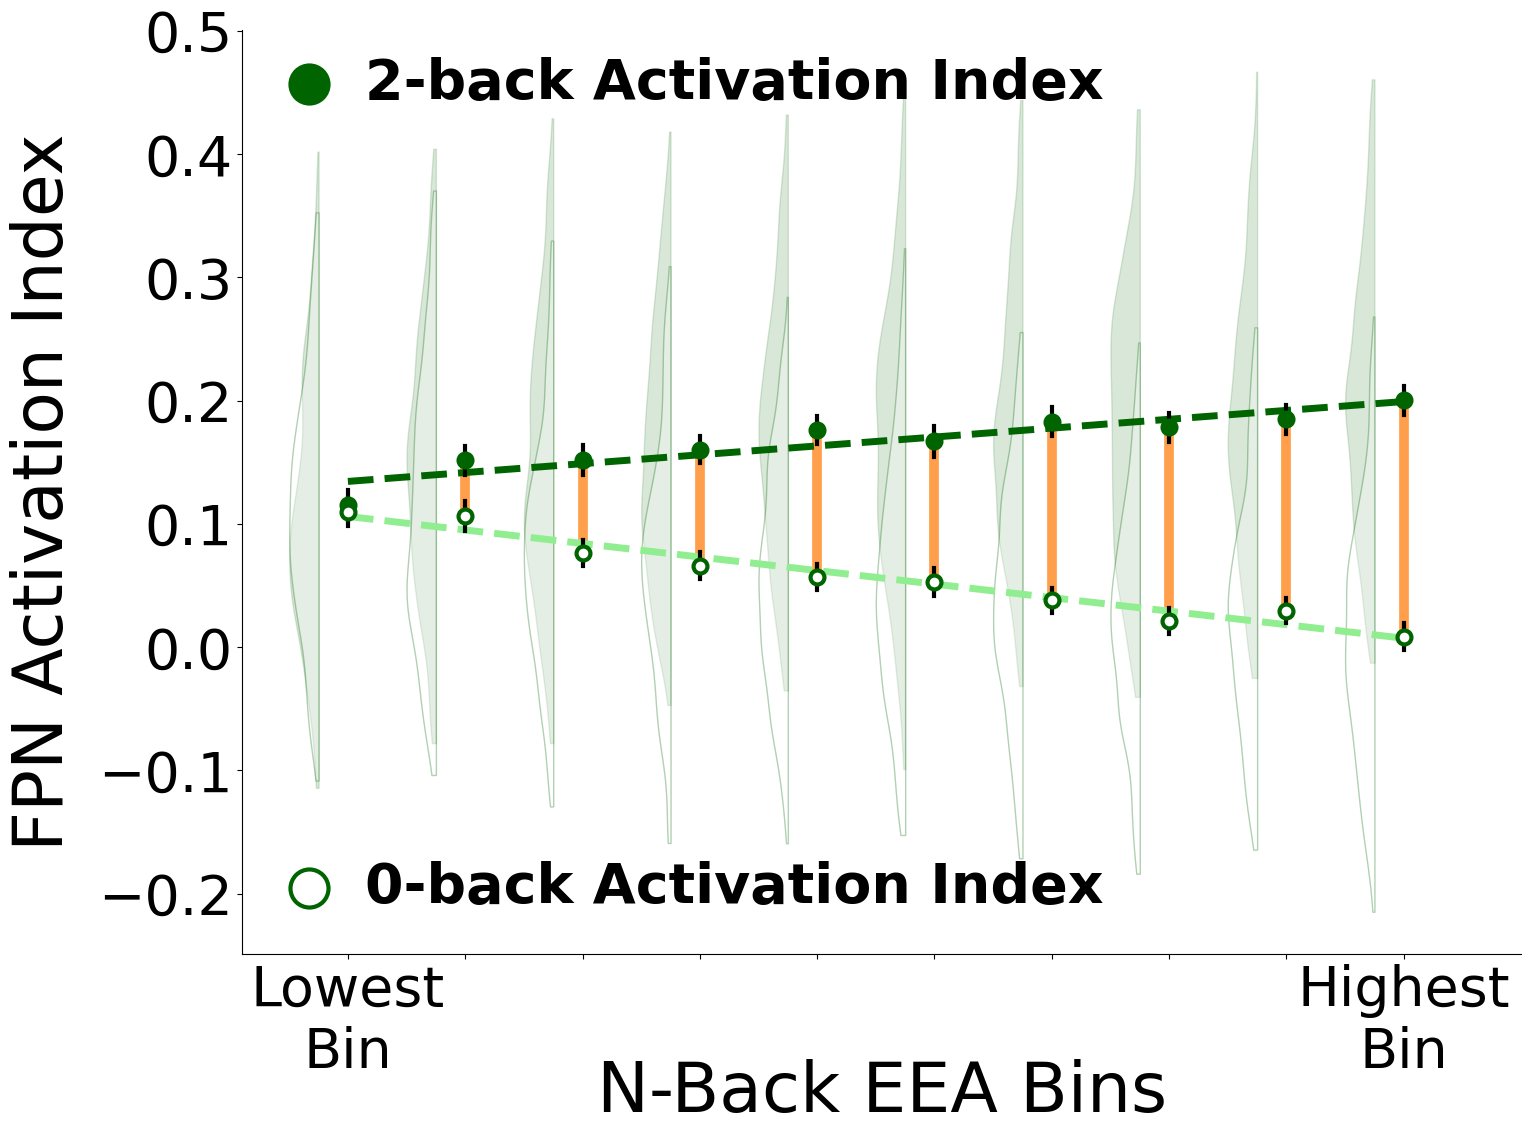

In [21]:
df = pd.read_csv('./abcd_base_nback_postmedians_v5_asw.csv')

x_strs = []
for x in np.arange(1.5, 31, 3):
    if x == 1.5:
        x_strs.append('Lowest\nBin')
    elif x == 28.5:
        x_strs.append('Highest\nBin')
    else:
        x_strs.append('')

left_Y = 'overall.v.mean.resid'
axis_label = "N-Back EEA Bins"

mid_Y0 = 'FPN_2bk'
mid_Y1 = 'FPN_0bk'

df[mid_Y0] = df[[mid_Y0]].values.flatten() / 100
df[mid_Y1] = df[[mid_Y1]].values.flatten() / 100


nbins = 10
dat_df = df.sort_values(left_Y).copy()
qts = np.arange(0, 1, 1/nbins)
qts = [np.quantile(dat_df[[left_Y]].values.flatten(), x) for x in qts]

def bin_q(val):
    if val == dat_df[[left_Y]].values.min():
        return 0
    for i, qt in enumerate(qts):
        if i == len(qts) - 1:
            return i
        if (val > qts[i]) and (val <= qts[i+1]):
            return i
        
dat_df['g_bin'] = list(map(bin_q, dat_df[[left_Y]].values.flatten()))

vals = []
mean_gs = []
for b in dat_df.sort_values('g_bin', ascending=True).g_bin.unique():
    v = [dat_df[dat_df.g_bin == b][[mid_Y0]].values.mean(), dat_df[dat_df.g_bin == b][[mid_Y1]].values.mean(), 
         stats.sem(dat_df[dat_df.g_bin == b][[mid_Y0]].values), stats.sem(dat_df[dat_df.g_bin == b][[mid_Y1]].values),
         dat_df[dat_df.g_bin == b][[mid_Y0]].values.flatten(), dat_df[dat_df.g_bin == b][[mid_Y1]].values.flatten()]
    vals.append(v)
    mean_gs.append(dat_df[dat_df.g_bin == b][[left_Y]].values.mean())
sub_ages = vals


# solution
X = [i for i, _ in enumerate(sub_ages)]
Y = [x[0] for x in sub_ages]
b, a = np.poly1d(np.polyfit(X, Y, 1))
newX = range(len(sub_ages))
yfit = [a + b * xi for xi in range(len(sub_ages))]


# solution
X2 = [i for i, _ in enumerate(sub_ages)]
Y2 = [x[1] for x in sub_ages]
b, a = np.poly1d(np.polyfit(X2, Y2, 1))
newX2 = range(len(sub_ages))
yfit2 = [a + b * xi for xi in range(len(sub_ages))]

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', label='2-Back Difference',
                          markerfacecolor='r', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='0-Back Difference',
                          markerfacecolor='b', markersize=15)]

x_str = []
for i in range(len(sub_ages)):
    if i == 0:
        x_str.append('Lowest\nBin')
    elif i == len(sub_ages)-1:
        x_str.append('Highest\nBin')
    else:
        x_str.append('')

        
        
#plt.subplot(2, 2, 2)
fig, ax = plt.subplots(1, 1, figsize=(16.5, 12))
cols = ['r', 'b']
for i, s in enumerate(sub_ages):
    plt.plot([i, i], [s[0], s[1]], marker=None, linestyle='solid', alpha=0.75, color='C1', linewidth=7, zorder=1)

plt.scatter(range(len(sub_ages)), [x[0] for x in sub_ages], marker='o', linestyle='solid', 
        alpha=1, color='darkgreen', s=100, label='2-back Activation Index', linewidth=3, edgecolors='darkgreen', zorder=3)

plt.scatter(range(len(sub_ages)), [x[1] for x in sub_ages], marker='o', linestyle='solid', 
            alpha=1, c='white', edgecolors='darkgreen', s=100, label='0-back Activation Index', linewidth=3, zorder=3)

for i in range(len(vals)):
    _vals = pd.DataFrame(vals[i][4])
    _vals.columns = ['v']
    low, high = _vals.v.quantile([0.025, 0.975])
    _vals_local = _vals.query('{low}<v<{high}'.format(low=low,high=high)).values.flatten()
    
    v1 = plt.violinplot(_vals_local, positions=[i-0.25], points=500, bw_method=0.25, widths=0.5,
                       showmeans=False, showextrema=False, 
                       showmedians=False)
    for b in v1['bodies']:
        # get the center
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        # modify the paths to not go further right than the center
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_color('darkgreen')
        b.set_alpha(0.15)
        b.set_zorder(0)

for i in range(len(vals)):
    _vals = pd.DataFrame(vals[i][5])
    _vals.columns = ['v']
    low, high = _vals.v.quantile([0.025, 0.975])
    _vals_local = _vals.query('{low}<v<{high}'.format(low=low,high=high)).values.flatten()
    
    v1 = plt.violinplot(_vals_local, positions=[i-0.25], points=500, bw_method=0.25, widths=0.5,
                       showmeans=False, showextrema=False, 
                       showmedians=False)
    for b in v1['bodies']:
        # get the center
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        # modify the paths to not go further right than the center
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_facecolor('white')
        b.set_edgecolor('darkgreen')
        b.set_alpha(0.3)
        b.set_zorder(0)


for s_a_i, s_a in enumerate(sub_ages):
    plt.plot([s_a_i, s_a_i], [s_a[0] + (1.96*s_a[2]), s_a[0] - (1.96*s_a[2])], c='k', linewidth=3, zorder=2)
    plt.plot([s_a_i, s_a_i], [s_a[1] + (1.96*s_a[3]), s_a[1] - (1.96*s_a[3])], c='k', linewidth=3, zorder=2)

plt.xlabel(axis_label, fontsize=50, labelpad=-15)  # << xlabel
plt.plot(newX, yfit, color='darkgreen', #'b', 
         linestyle='--', linewidth=5, zorder=1)
plt.plot(newX2, yfit2, color='lightgreen', #'r', 
         linestyle='--', linewidth=5, zorder=1)
plt.xticks(range(len(sub_ages)), x_str, fontsize=40)
plt.xlim((-0.9, 10))


legend_properties = {'weight':'bold', 'size':40}
lgnd = plt.legend(ncol=1, frameon=False, handletextpad=0, columnspacing=3, prop=legend_properties, bbox_to_anchor=(-0.03, 1.025), loc=2, labelspacing=13.5)
#change the marker size manually for both lines
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [750]



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
assert mid_Y0.split('_')[0] == mid_Y1.split('_')[0]
y_canonical = mid_Y0.split('_')[0]
plt.ylabel(f'{y_canonical} Activation Index', fontsize=50, labelpad=15)


ax.tick_params(axis='y', which='major', labelsize=40)


plt.show()

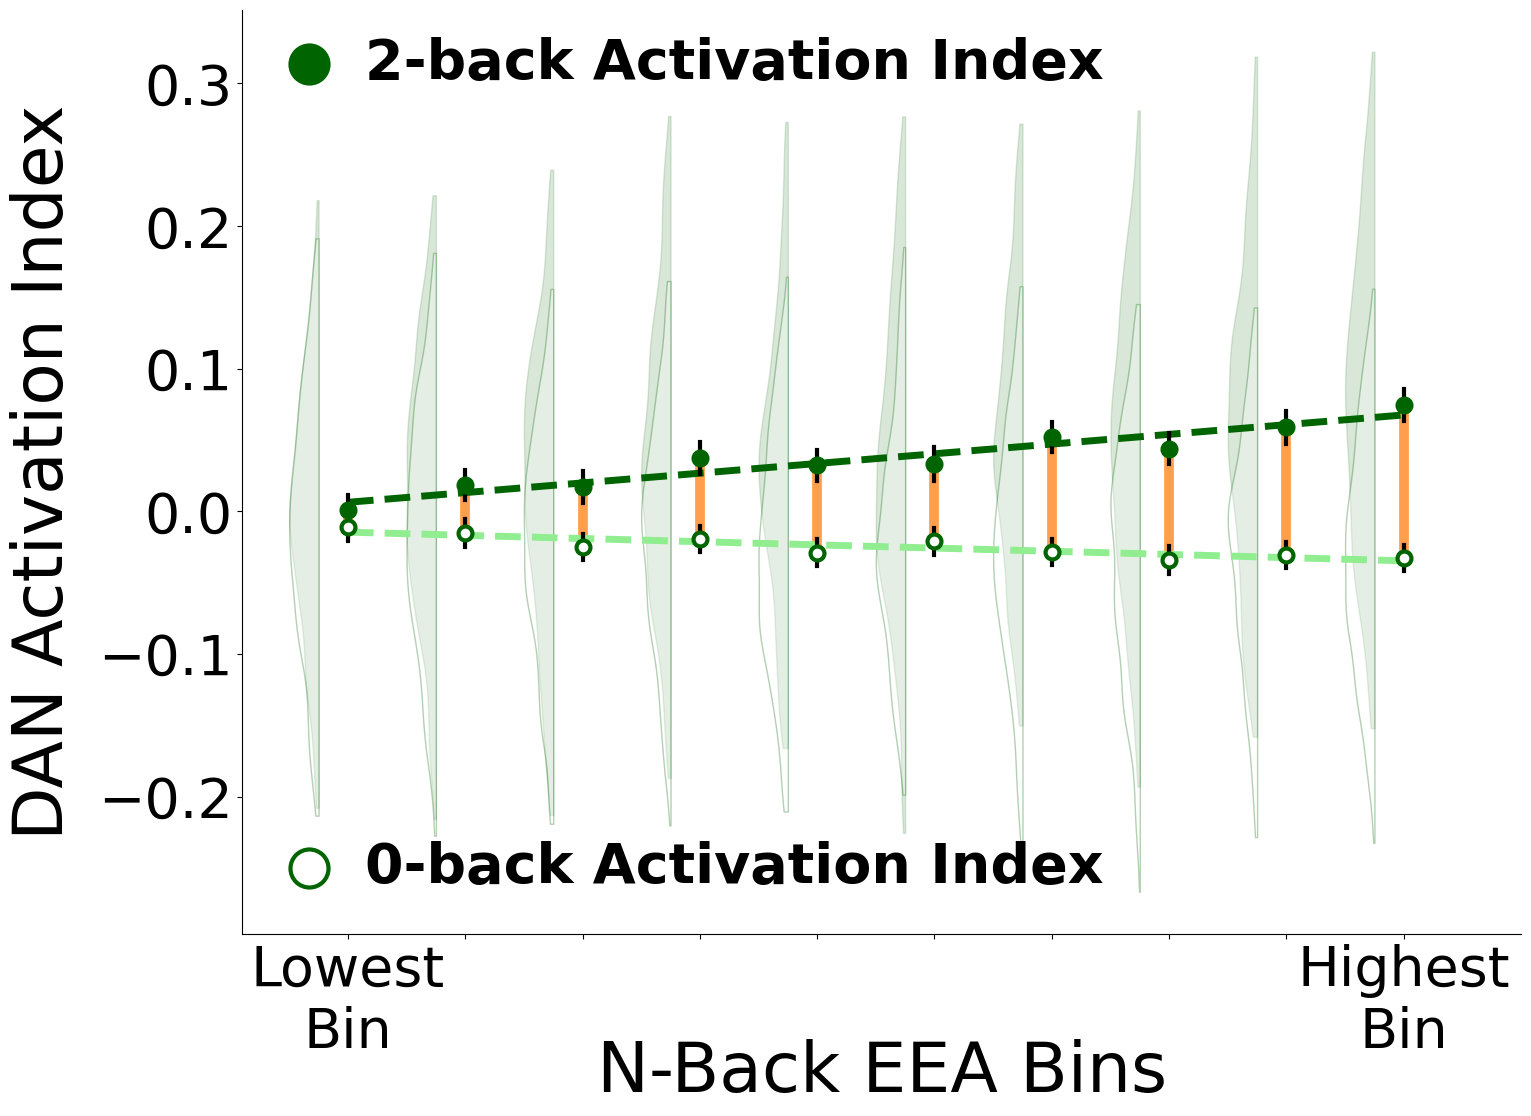

In [22]:
df = pd.read_csv('./abcd_base_nback_postmedians_v5_asw.csv')

x_strs = []
for x in np.arange(1.5, 31, 3):
    if x == 1.5:
        x_strs.append('Lowest\nBin')
    elif x == 28.5:
        x_strs.append('Highest\nBin')
    else:
        x_strs.append('')

left_Y = 'overall.v.mean.resid'
axis_label = "N-Back EEA Bins"

mid_Y0 = 'DAN_2bk'
mid_Y1 = 'DAN_0bk'

df[mid_Y0] = df[[mid_Y0]].values.flatten() / 100
df[mid_Y1] = df[[mid_Y1]].values.flatten() / 100


nbins = 10
dat_df = df.sort_values(left_Y).copy()
qts = np.arange(0, 1, 1/nbins)
qts = [np.quantile(dat_df[[left_Y]].values.flatten(), x) for x in qts]

def bin_q(val):
    if val == dat_df[[left_Y]].values.min():
        return 0
    for i, qt in enumerate(qts):
        if i == len(qts) - 1:
            return i
        if (val > qts[i]) and (val <= qts[i+1]):
            return i
        
dat_df['g_bin'] = list(map(bin_q, dat_df[[left_Y]].values.flatten()))

vals = []
mean_gs = []
for b in dat_df.sort_values('g_bin', ascending=True).g_bin.unique():
    v = [dat_df[dat_df.g_bin == b][[mid_Y0]].values.mean(), dat_df[dat_df.g_bin == b][[mid_Y1]].values.mean(), 
         stats.sem(dat_df[dat_df.g_bin == b][[mid_Y0]].values), stats.sem(dat_df[dat_df.g_bin == b][[mid_Y1]].values),
         dat_df[dat_df.g_bin == b][[mid_Y0]].values.flatten(), dat_df[dat_df.g_bin == b][[mid_Y1]].values.flatten()]
    vals.append(v)
    mean_gs.append(dat_df[dat_df.g_bin == b][[left_Y]].values.mean())
sub_ages = vals


# solution
X = [i for i, _ in enumerate(sub_ages)]
Y = [x[0] for x in sub_ages]
b, a = np.poly1d(np.polyfit(X, Y, 1))
newX = range(len(sub_ages))
yfit = [a + b * xi for xi in range(len(sub_ages))]


# solution
X2 = [i for i, _ in enumerate(sub_ages)]
Y2 = [x[1] for x in sub_ages]
b, a = np.poly1d(np.polyfit(X2, Y2, 1))
newX2 = range(len(sub_ages))
yfit2 = [a + b * xi for xi in range(len(sub_ages))]

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', label='2-Back Difference',
                          markerfacecolor='r', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='0-Back Difference',
                          markerfacecolor='b', markersize=15)]

x_str = []
for i in range(len(sub_ages)):
    if i == 0:
        x_str.append('Lowest\nBin')
    elif i == len(sub_ages)-1:
        x_str.append('Highest\nBin')
    else:
        x_str.append('')

        
        
#plt.subplot(2, 2, 2)
fig, ax = plt.subplots(1, 1, figsize=(16.5, 12))
cols = ['r', 'b']
for i, s in enumerate(sub_ages):
    plt.plot([i, i], [s[0], s[1]], marker=None, linestyle='solid', alpha=0.75, color='C1', linewidth=7, zorder=1)

plt.scatter(range(len(sub_ages)), [x[0] for x in sub_ages], marker='o', linestyle='solid', 
        alpha=1, color='darkgreen', s=100, label='2-back Activation Index', linewidth=3, edgecolors='darkgreen', zorder=3)

plt.scatter(range(len(sub_ages)), [x[1] for x in sub_ages], marker='o', linestyle='solid', 
            alpha=1, c='white', edgecolors='darkgreen', s=100, label='0-back Activation Index', linewidth=3, zorder=3)

for i in range(len(vals)):
    _vals = pd.DataFrame(vals[i][4])
    _vals.columns = ['v']
    low, high = _vals.v.quantile([0.025, 0.975])
    _vals_local = _vals.query('{low}<v<{high}'.format(low=low,high=high)).values.flatten()
    
    v1 = plt.violinplot(_vals_local, positions=[i-0.25], points=500, bw_method=0.25, widths=0.5,
                       showmeans=False, showextrema=False, 
                       showmedians=False)
    for b in v1['bodies']:
        # get the center
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        # modify the paths to not go further right than the center
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_color('darkgreen')
        b.set_alpha(0.15)
        b.set_zorder(0)

for i in range(len(vals)):
    _vals = pd.DataFrame(vals[i][5])
    _vals.columns = ['v']
    low, high = _vals.v.quantile([0.025, 0.975])
    _vals_local = _vals.query('{low}<v<{high}'.format(low=low,high=high)).values.flatten()
    
    v1 = plt.violinplot(_vals_local, positions=[i-0.25], points=500, bw_method=0.25, widths=0.5,
                       showmeans=False, showextrema=False, 
                       showmedians=False)
    for b in v1['bodies']:
        # get the center
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        # modify the paths to not go further right than the center
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_facecolor('white')
        b.set_edgecolor('darkgreen')
        b.set_alpha(0.3)
        b.set_zorder(0)


for s_a_i, s_a in enumerate(sub_ages):
    plt.plot([s_a_i, s_a_i], [s_a[0] + (1.96*s_a[2]), s_a[0] - (1.96*s_a[2])], c='k', linewidth=3, zorder=2)
    plt.plot([s_a_i, s_a_i], [s_a[1] + (1.96*s_a[3]), s_a[1] - (1.96*s_a[3])], c='k', linewidth=3, zorder=2)

plt.xlabel(axis_label, fontsize=50, labelpad=-15)  # << xlabel
plt.plot(newX, yfit, color='darkgreen', #'b', 
         linestyle='--', linewidth=5, zorder=1)
plt.plot(newX2, yfit2, color='lightgreen', #'r', 
         linestyle='--', linewidth=5, zorder=1)
plt.xticks(range(len(sub_ages)), x_str, fontsize=40)
plt.xlim((-0.9, 10))


legend_properties = {'weight':'bold', 'size':40}
lgnd = plt.legend(ncol=1, frameon=False, handletextpad=0, columnspacing=3, prop=legend_properties, bbox_to_anchor=(-0.03, 1.025), loc=2, labelspacing=13.5)
#change the marker size manually for both lines
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [750]



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
assert mid_Y0.split('_')[0] == mid_Y1.split('_')[0]
y_canonical = mid_Y0.split('_')[0]
plt.ylabel(f'{y_canonical} Activation Index', fontsize=50, labelpad=15)


ax.tick_params(axis='y', which='major', labelsize=40)


plt.show()

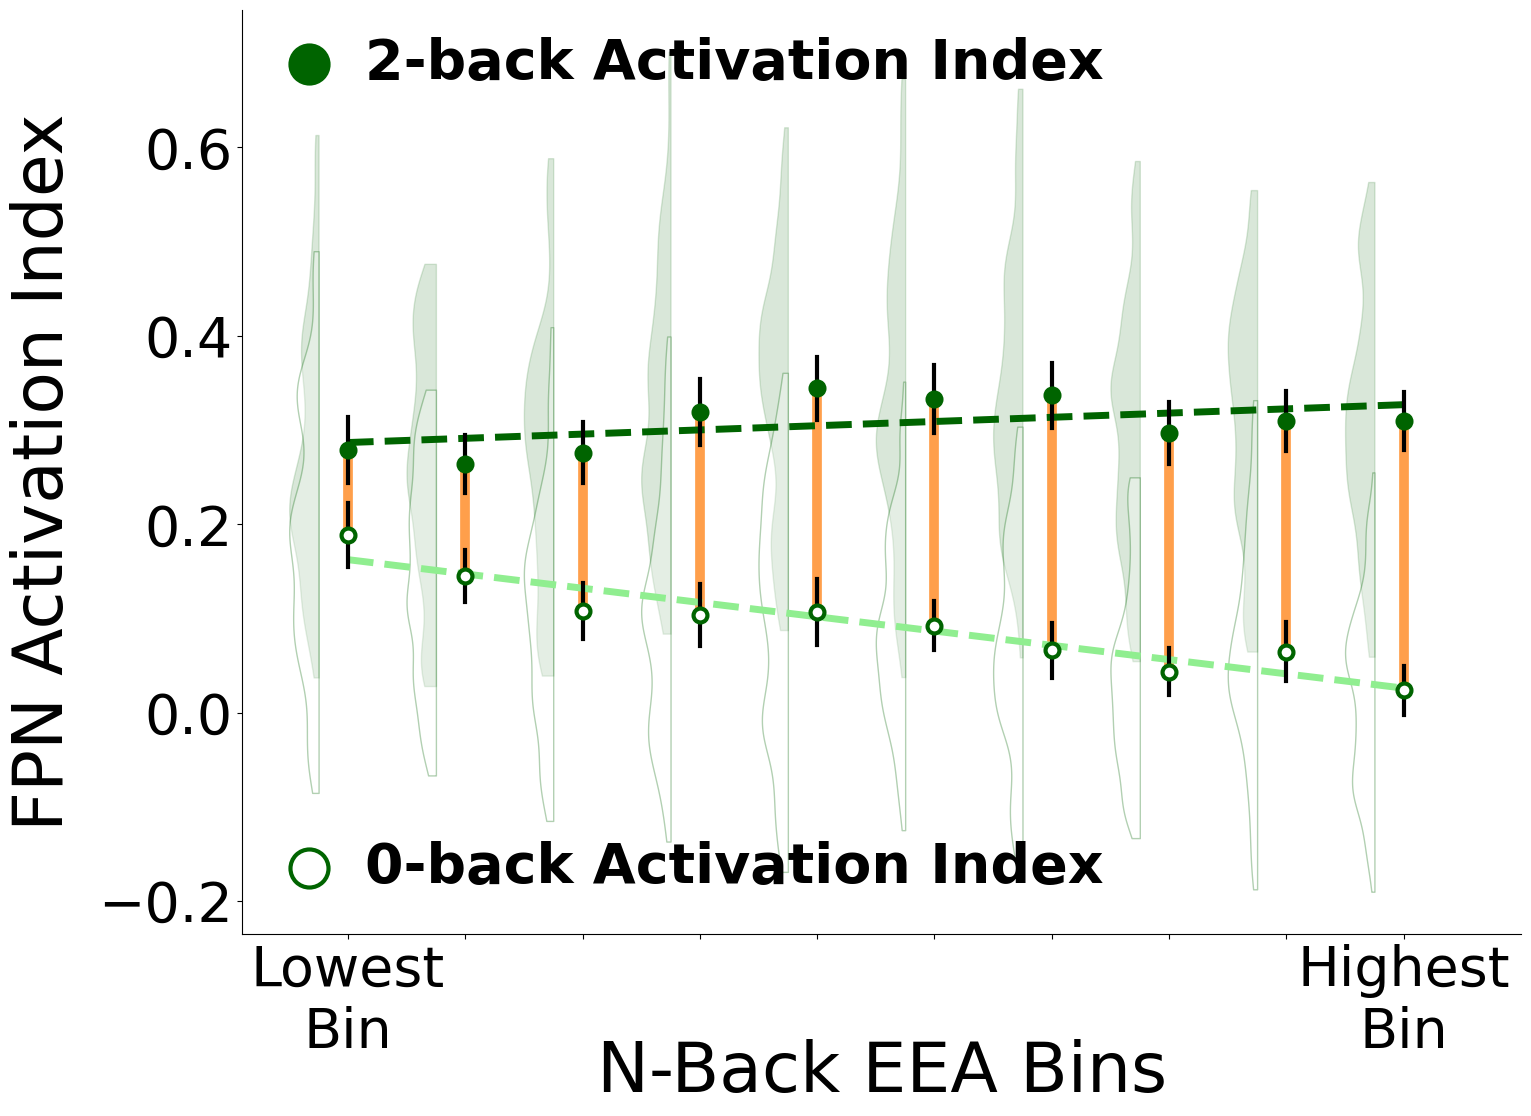

In [23]:
df = pd.read_csv('./hcp_nback_postmedians_v5_asw.csv')

x_strs = []
for x in np.arange(1.5, 31, 3):
    if x == 1.5:
        x_strs.append('Lowest\nBin')
    elif x == 28.5:
        x_strs.append('Highest\nBin')
    else:
        x_strs.append('')

left_Y = 'overall.v.mean.resid'
axis_label = "N-Back EEA Bins"

mid_Y0 = 'FPN_2bk'
mid_Y1 = 'FPN_0bk'

df[mid_Y0] = df[[mid_Y0]].values.flatten() / 100
df[mid_Y1] = df[[mid_Y1]].values.flatten() / 100


nbins = 10
dat_df = df.sort_values(left_Y).copy()
qts = np.arange(0, 1, 1/nbins)
qts = [np.quantile(dat_df[[left_Y]].values.flatten(), x) for x in qts]

def bin_q(val):
    if val == dat_df[[left_Y]].values.min():
        return 0
    for i, qt in enumerate(qts):
        if i == len(qts) - 1:
            return i
        if (val > qts[i]) and (val <= qts[i+1]):
            return i
        
dat_df['g_bin'] = list(map(bin_q, dat_df[[left_Y]].values.flatten()))

vals = []
mean_gs = []
for b in dat_df.sort_values('g_bin', ascending=True).g_bin.unique():
    v = [dat_df[dat_df.g_bin == b][[mid_Y0]].values.mean(), dat_df[dat_df.g_bin == b][[mid_Y1]].values.mean(), 
         stats.sem(dat_df[dat_df.g_bin == b][[mid_Y0]].values), stats.sem(dat_df[dat_df.g_bin == b][[mid_Y1]].values),
         dat_df[dat_df.g_bin == b][[mid_Y0]].values.flatten(), dat_df[dat_df.g_bin == b][[mid_Y1]].values.flatten()]
    vals.append(v)
    mean_gs.append(dat_df[dat_df.g_bin == b][[left_Y]].values.mean())
sub_ages = vals


# solution
X = [i for i, _ in enumerate(sub_ages)]
Y = [x[0] for x in sub_ages]
b, a = np.poly1d(np.polyfit(X, Y, 1))
newX = range(len(sub_ages))
yfit = [a + b * xi for xi in range(len(sub_ages))]


# solution
X2 = [i for i, _ in enumerate(sub_ages)]
Y2 = [x[1] for x in sub_ages]
b, a = np.poly1d(np.polyfit(X2, Y2, 1))
newX2 = range(len(sub_ages))
yfit2 = [a + b * xi for xi in range(len(sub_ages))]

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', label='2-Back Difference',
                          markerfacecolor='r', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='0-Back Difference',
                          markerfacecolor='b', markersize=15)]

x_str = []
for i in range(len(sub_ages)):
    if i == 0:
        x_str.append('Lowest\nBin')
    elif i == len(sub_ages)-1:
        x_str.append('Highest\nBin')
    else:
        x_str.append('')

        
        
#plt.subplot(2, 2, 2)
fig, ax = plt.subplots(1, 1, figsize=(16.5, 12))
cols = ['r', 'b']
for i, s in enumerate(sub_ages):
    plt.plot([i, i], [s[0], s[1]], marker=None, linestyle='solid', alpha=0.75, color='C1', linewidth=7, zorder=1)

plt.scatter(range(len(sub_ages)), [x[0] for x in sub_ages], marker='o', linestyle='solid', 
        alpha=1, color='darkgreen', s=100, label='2-back Activation Index', linewidth=3, edgecolors='darkgreen', zorder=3)

plt.scatter(range(len(sub_ages)), [x[1] for x in sub_ages], marker='o', linestyle='solid', 
            alpha=1, c='white', edgecolors='darkgreen', s=100, label='0-back Activation Index', linewidth=3, zorder=3)

for i in range(len(vals)):
    _vals = pd.DataFrame(vals[i][4])
    _vals.columns = ['v']
    low, high = _vals.v.quantile([0.025, 0.975])
    _vals_local = _vals.query('{low}<v<{high}'.format(low=low,high=high)).values.flatten()
    
    v1 = plt.violinplot(_vals_local, positions=[i-0.25], points=500, bw_method=0.25, widths=0.5,
                       showmeans=False, showextrema=False, 
                       showmedians=False)
    for b in v1['bodies']:
        # get the center
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        # modify the paths to not go further right than the center
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_color('darkgreen')
        b.set_alpha(0.15)
        b.set_zorder(0)

for i in range(len(vals)):
    _vals = pd.DataFrame(vals[i][5])
    _vals.columns = ['v']
    low, high = _vals.v.quantile([0.025, 0.975])
    _vals_local = _vals.query('{low}<v<{high}'.format(low=low,high=high)).values.flatten()
    
    v1 = plt.violinplot(_vals_local, positions=[i-0.25], points=500, bw_method=0.25, widths=0.5,
                       showmeans=False, showextrema=False, 
                       showmedians=False)
    for b in v1['bodies']:
        # get the center
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        # modify the paths to not go further right than the center
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_facecolor('white')
        b.set_edgecolor('darkgreen')
        b.set_alpha(0.3)
        b.set_zorder(0)


for s_a_i, s_a in enumerate(sub_ages):
    plt.plot([s_a_i, s_a_i], [s_a[0] + (1.96*s_a[2]), s_a[0] - (1.96*s_a[2])], c='k', linewidth=3, zorder=2)
    plt.plot([s_a_i, s_a_i], [s_a[1] + (1.96*s_a[3]), s_a[1] - (1.96*s_a[3])], c='k', linewidth=3, zorder=2)

plt.xlabel(axis_label, fontsize=50, labelpad=-15)  # << xlabel
plt.plot(newX, yfit, color='darkgreen', #'b', 
         linestyle='--', linewidth=5, zorder=1)
plt.plot(newX2, yfit2, color='lightgreen', #'r', 
         linestyle='--', linewidth=5, zorder=1)
plt.xticks(range(len(sub_ages)), x_str, fontsize=40)
plt.xlim((-0.9, 10))


legend_properties = {'weight':'bold', 'size':40}
lgnd = plt.legend(ncol=1, frameon=False, handletextpad=0, columnspacing=3, prop=legend_properties, bbox_to_anchor=(-0.03, 1.025), loc=2, labelspacing=13.5)
#change the marker size manually for both lines
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [750]



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
assert mid_Y0.split('_')[0] == mid_Y1.split('_')[0]
y_canonical = mid_Y0.split('_')[0]
plt.ylabel(f'{y_canonical} Activation Index', fontsize=50, labelpad=15)


ax.tick_params(axis='y', which='major', labelsize=40)


plt.show()

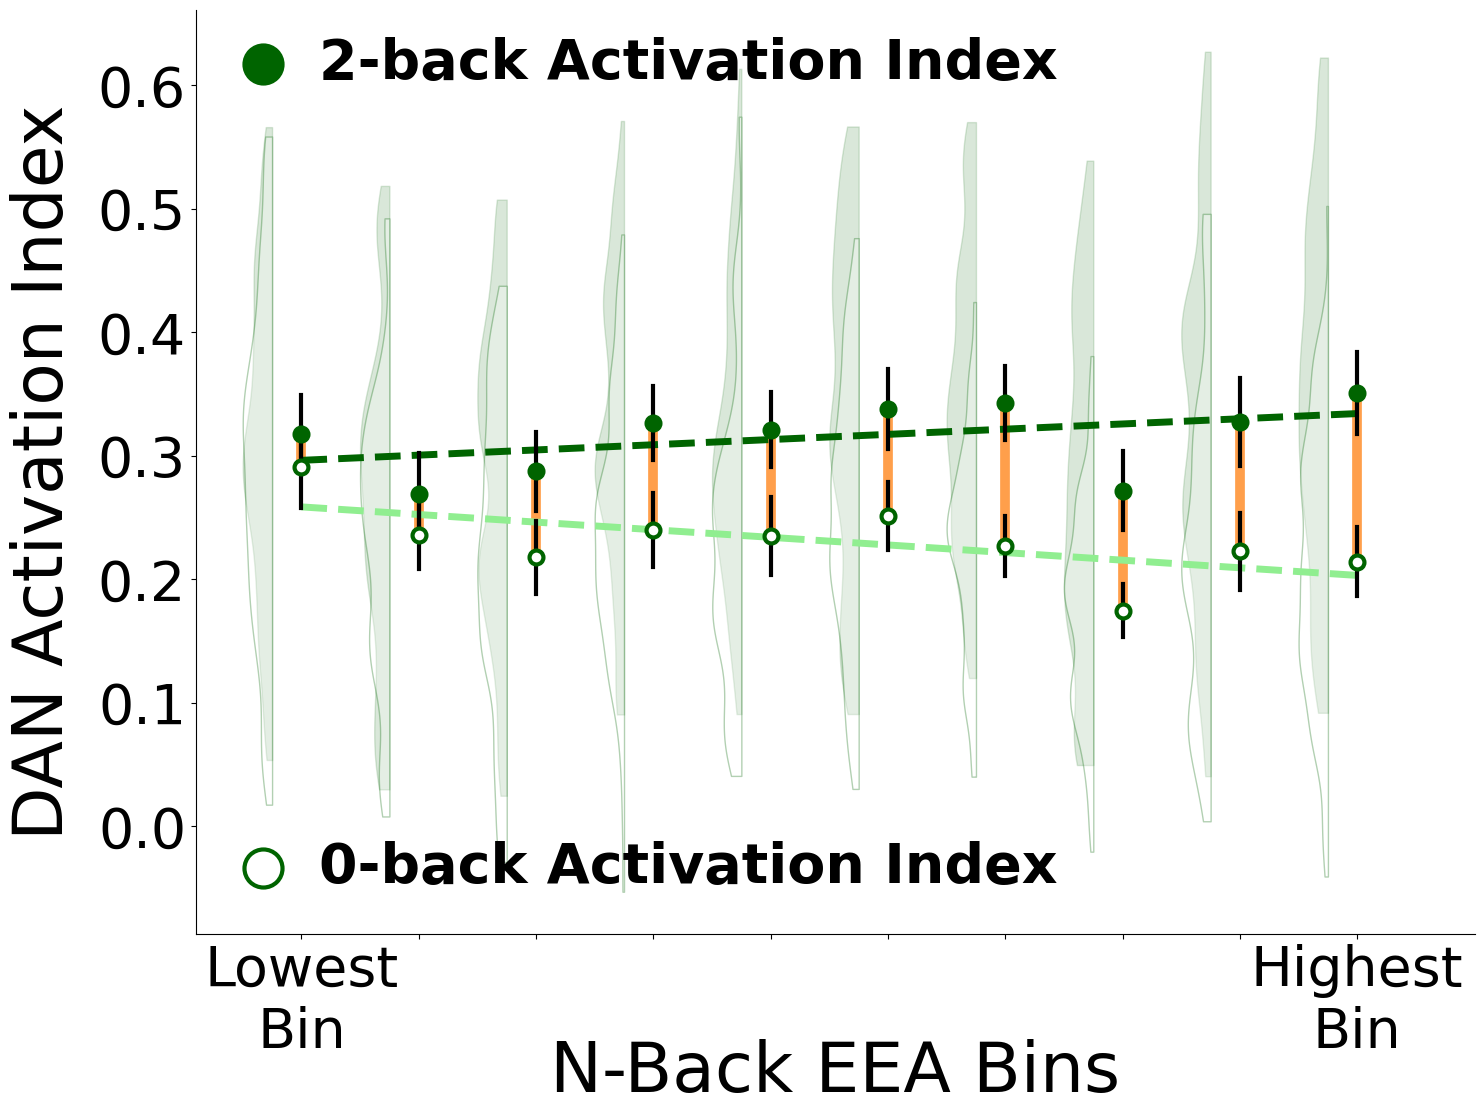

In [24]:
df = pd.read_csv('./hcp_nback_postmedians_v5_asw.csv')

x_strs = []
for x in np.arange(1.5, 31, 3):
    if x == 1.5:
        x_strs.append('Lowest\nBin')
    elif x == 28.5:
        x_strs.append('Highest\nBin')
    else:
        x_strs.append('')

left_Y = 'overall.v.mean.resid'
axis_label = "N-Back EEA Bins"

mid_Y0 = 'DAN_2bk'
mid_Y1 = 'DAN_0bk'

df[mid_Y0] = df[[mid_Y0]].values.flatten() / 100
df[mid_Y1] = df[[mid_Y1]].values.flatten() / 100


nbins = 10
dat_df = df.sort_values(left_Y).copy()
qts = np.arange(0, 1, 1/nbins)
qts = [np.quantile(dat_df[[left_Y]].values.flatten(), x) for x in qts]

def bin_q(val):
    if val == dat_df[[left_Y]].values.min():
        return 0
    for i, qt in enumerate(qts):
        if i == len(qts) - 1:
            return i
        if (val > qts[i]) and (val <= qts[i+1]):
            return i
        
dat_df['g_bin'] = list(map(bin_q, dat_df[[left_Y]].values.flatten()))

vals = []
mean_gs = []
for b in dat_df.sort_values('g_bin', ascending=True).g_bin.unique():
    v = [dat_df[dat_df.g_bin == b][[mid_Y0]].values.mean(), dat_df[dat_df.g_bin == b][[mid_Y1]].values.mean(), 
         stats.sem(dat_df[dat_df.g_bin == b][[mid_Y0]].values), stats.sem(dat_df[dat_df.g_bin == b][[mid_Y1]].values),
         dat_df[dat_df.g_bin == b][[mid_Y0]].values.flatten(), dat_df[dat_df.g_bin == b][[mid_Y1]].values.flatten()]
    vals.append(v)
    mean_gs.append(dat_df[dat_df.g_bin == b][[left_Y]].values.mean())
sub_ages = vals


# solution
X = [i for i, _ in enumerate(sub_ages)]
Y = [x[0] for x in sub_ages]
b, a = np.poly1d(np.polyfit(X, Y, 1))
newX = range(len(sub_ages))
yfit = [a + b * xi for xi in range(len(sub_ages))]


# solution
X2 = [i for i, _ in enumerate(sub_ages)]
Y2 = [x[1] for x in sub_ages]
b, a = np.poly1d(np.polyfit(X2, Y2, 1))
newX2 = range(len(sub_ages))
yfit2 = [a + b * xi for xi in range(len(sub_ages))]

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', label='2-Back Difference',
                          markerfacecolor='r', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='0-Back Difference',
                          markerfacecolor='b', markersize=15)]

x_str = []
for i in range(len(sub_ages)):
    if i == 0:
        x_str.append('Lowest\nBin')
    elif i == len(sub_ages)-1:
        x_str.append('Highest\nBin')
    else:
        x_str.append('')

        
        
#plt.subplot(2, 2, 2)
fig, ax = plt.subplots(1, 1, figsize=(16.5, 12))
cols = ['r', 'b']
for i, s in enumerate(sub_ages):
    plt.plot([i, i], [s[0], s[1]], marker=None, linestyle='solid', alpha=0.75, color='C1', linewidth=7, zorder=1)

plt.scatter(range(len(sub_ages)), [x[0] for x in sub_ages], marker='o', linestyle='solid', 
        alpha=1, color='darkgreen', s=100, label='2-back Activation Index', linewidth=3, edgecolors='darkgreen', zorder=3)

plt.scatter(range(len(sub_ages)), [x[1] for x in sub_ages], marker='o', linestyle='solid', 
            alpha=1, c='white', edgecolors='darkgreen', s=100, label='0-back Activation Index', linewidth=3, zorder=3)

for i in range(len(vals)):
    _vals = pd.DataFrame(vals[i][4])
    _vals.columns = ['v']
    low, high = _vals.v.quantile([0.025, 0.975])
    _vals_local = _vals.query('{low}<v<{high}'.format(low=low,high=high)).values.flatten()
    
    v1 = plt.violinplot(_vals_local, positions=[i-0.25], points=500, bw_method=0.25, widths=0.5,
                       showmeans=False, showextrema=False, 
                       showmedians=False)
    for b in v1['bodies']:
        # get the center
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        # modify the paths to not go further right than the center
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_color('darkgreen')
        b.set_alpha(0.15)
        b.set_zorder(0)

for i in range(len(vals)):
    _vals = pd.DataFrame(vals[i][5])
    _vals.columns = ['v']
    low, high = _vals.v.quantile([0.025, 0.975])
    _vals_local = _vals.query('{low}<v<{high}'.format(low=low,high=high)).values.flatten()
    
    v1 = plt.violinplot(_vals_local, positions=[i-0.25], points=500, bw_method=0.25, widths=0.5,
                       showmeans=False, showextrema=False, 
                       showmedians=False)
    for b in v1['bodies']:
        # get the center
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        # modify the paths to not go further right than the center
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_facecolor('white')
        b.set_edgecolor('darkgreen')
        b.set_alpha(0.3)
        b.set_zorder(0)


for s_a_i, s_a in enumerate(sub_ages):
    plt.plot([s_a_i, s_a_i], [s_a[0] + (1.96*s_a[2]), s_a[0] - (1.96*s_a[2])], c='k', linewidth=3, zorder=2)
    plt.plot([s_a_i, s_a_i], [s_a[1] + (1.96*s_a[3]), s_a[1] - (1.96*s_a[3])], c='k', linewidth=3, zorder=2)

plt.xlabel(axis_label, fontsize=50, labelpad=-15)  # << xlabel
plt.plot(newX, yfit, color='darkgreen', #'b', 
         linestyle='--', linewidth=5, zorder=1)
plt.plot(newX2, yfit2, color='lightgreen', #'r', 
         linestyle='--', linewidth=5, zorder=1)
plt.xticks(range(len(sub_ages)), x_str, fontsize=40)
plt.xlim((-0.9, 10))


legend_properties = {'weight':'bold', 'size':40}
lgnd = plt.legend(ncol=1, frameon=False, handletextpad=0, columnspacing=3, prop=legend_properties, bbox_to_anchor=(-0.03, 1.025), loc=2, labelspacing=13.5)
#change the marker size manually for both lines
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [750]



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
assert mid_Y0.split('_')[0] == mid_Y1.split('_')[0]
y_canonical = mid_Y0.split('_')[0]
plt.ylabel(f'{y_canonical} Activation Index', fontsize=50, labelpad=15)


ax.tick_params(axis='y', which='major', labelsize=40)


plt.show()